In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

# Write a query to fetch data
query1 = """
SELECT constituency, leading_candidate, leading_party, margin 
FROM election_results 
order by margin desc
limit 10
"""

# Execute the query
cursor.execute(query1)

# Fetch all results
results = cursor.fetchall()

# Convert results to a DataFrame
df = pd.DataFrame(results, columns=['Constituency', 'Leading Candidate', 'Leading Party', 'Margin'])

# Close the cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
df


,Constituency,Leading Candidate,Leading Party,Margin
0,INDORE,SHANKAR LALWANI,Bharatiya Janata Party,1175092
1,Dhubri,RAKIBUL HUSSAIN,Indian National Congress,1012476
2,VIDISHA,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,821408
3,Navsari,C R PATIL,Bharatiya Janata Party,773551
4,Gandhinagar,AMIT SHAH,Bharatiya Janata Party,744716
5,Diamond harbour,ABHISHEK BANERJEE,All India Trinamool Congress,710930
6,Tripura West,BIPLAB KUMAR DEB,Bharatiya Janata Party,611578
7,Vadodara,DR. HEMANG JOSHI,Bharatiya Janata Party,582126
8,RAIPUR,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,575285
9,TIRUVALLUR,Sasikanth Senthil,Indian National Congress,572155


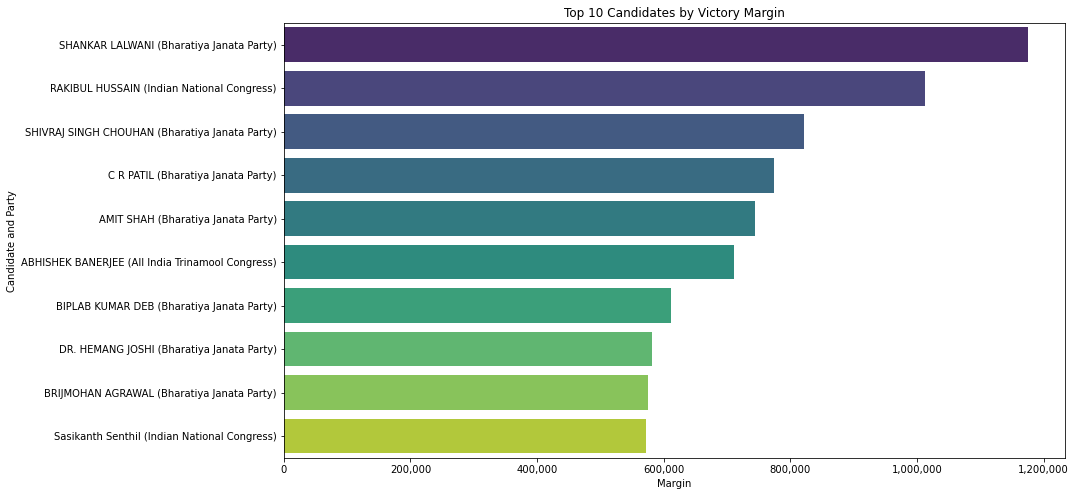

In [2]:
df['Candidate and Party'] = df['Leading Candidate'] + ' (' + df['Leading Party'] + ')'

plt.figure(figsize=(14, 8))
sns.barplot(x='Margin', y='Candidate and Party', data=df, palette="viridis")
plt.title('Top 10 Candidates by Victory Margin')
plt.xlabel('Margin')
plt.ylabel('Candidate and Party')

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

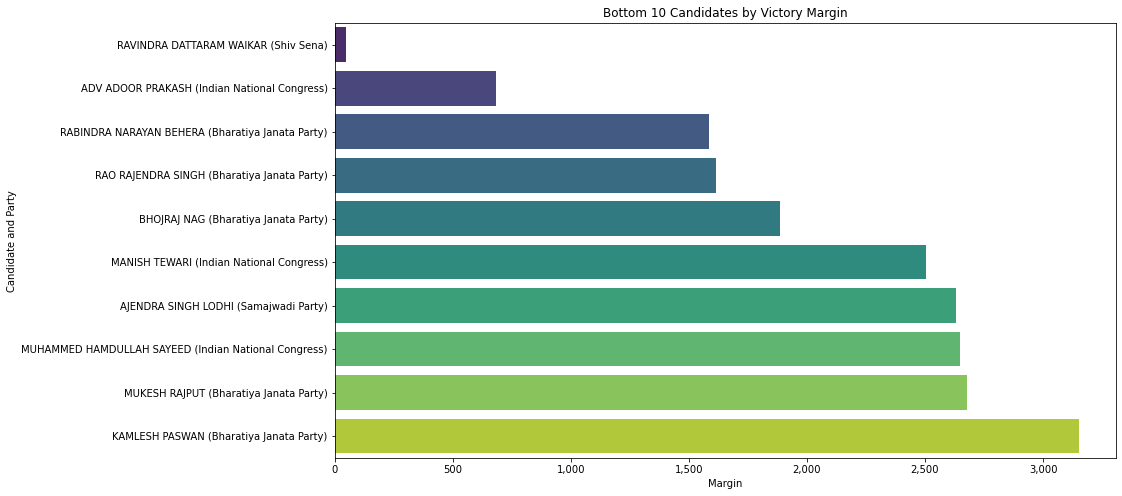

In [12]:
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query3 = """
SELECT constituency, leading_candidate, leading_party, margin 
FROM election_results 
order by margin asc
limit 10
"""

cursor.execute(query3)

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['Constituency', 'Leading Candidate', 'Leading Party', 'Margin'])

cursor.close()
conn.close()

df

df['Candidate and Party'] = df['Leading Candidate'] + ' (' + df['Leading Party'] + ')'

plt.figure(figsize=(14, 8))
sns.barplot(x='Margin', y='Candidate and Party', data=df, palette="viridis")
plt.title('Bottom 10 Candidates by Victory Margin')
plt.xlabel('Margin')
plt.ylabel('Candidate and Party')

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

In [13]:
df

,Constituency,Leading Candidate,Leading Party,Margin,Candidate and Party
0,Mumbai North West,RAVINDRA DATTARAM WAIKAR,Shiv Sena,48,RAVINDRA DATTARAM WAIKAR (Shiv Sena)
1,Attingal,ADV ADOOR PRAKASH,Indian National Congress,684,ADV ADOOR PRAKASH (Indian National Congress)
2,Jajpur,RABINDRA NARAYAN BEHERA,Bharatiya Janata Party,1587,RABINDRA NARAYAN BEHERA (Bharatiya Janata Party)
3,JAIPUR RURAL,RAO RAJENDRA SINGH,Bharatiya Janata Party,1615,RAO RAJENDRA SINGH (Bharatiya Janata Party)
4,KANKER,BHOJRAJ NAG,Bharatiya Janata Party,1884,BHOJRAJ NAG (Bharatiya Janata Party)
5,Chandigarh,MANISH TEWARI,Indian National Congress,2504,MANISH TEWARI (Indian National Congress)
6,Hamirpur,AJENDRA SINGH LODHI,Samajwadi Party,2629,AJENDRA SINGH LODHI (Samajwadi Party)
7,Lakshadweep,MUHAMMED HAMDULLAH SAYEED,Indian National Congress,2647,MUHAMMED HAMDULLAH SAYEED (Indian National Con...
8,Farrukhabad,MUKESH RAJPUT,Bharatiya Janata Party,2678,MUKESH RAJPUT (Bharatiya Janata Party)
9,Bansgaon,KAMLESH PASWAN,Bharatiya Janata Party,3150,KAMLESH PASWAN (Bharatiya Janata Party)


In [4]:
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query2 = """
select leading_party, COUNT(leading_party) as total_counts
from election_results
group by leading_party
"""

cursor.execute(query2)

results_query_2 = cursor.fetchall()

df_2 = pd.DataFrame(results_query_2, columns=['leading_party', 'Total Counts'])

cursor.close()
conn.close()

df_2


,leading_party,Total Counts
0,Bharatiya Janata Party,239
1,Indian National Congress,99
2,Jammu & Kashmir National Conference,2
3,Dravida Munnetra Kazhagam,22
4,Nationalist Congress Party- Sharadchandra Pawar,8
5,Communist Party of India (Marxist),4
6,Telugu Desam,16
7,Samajwadi Party,37
8,Aam Aadmi Party,3
9,Yuvajana Sramika Rythu Congress Party,4


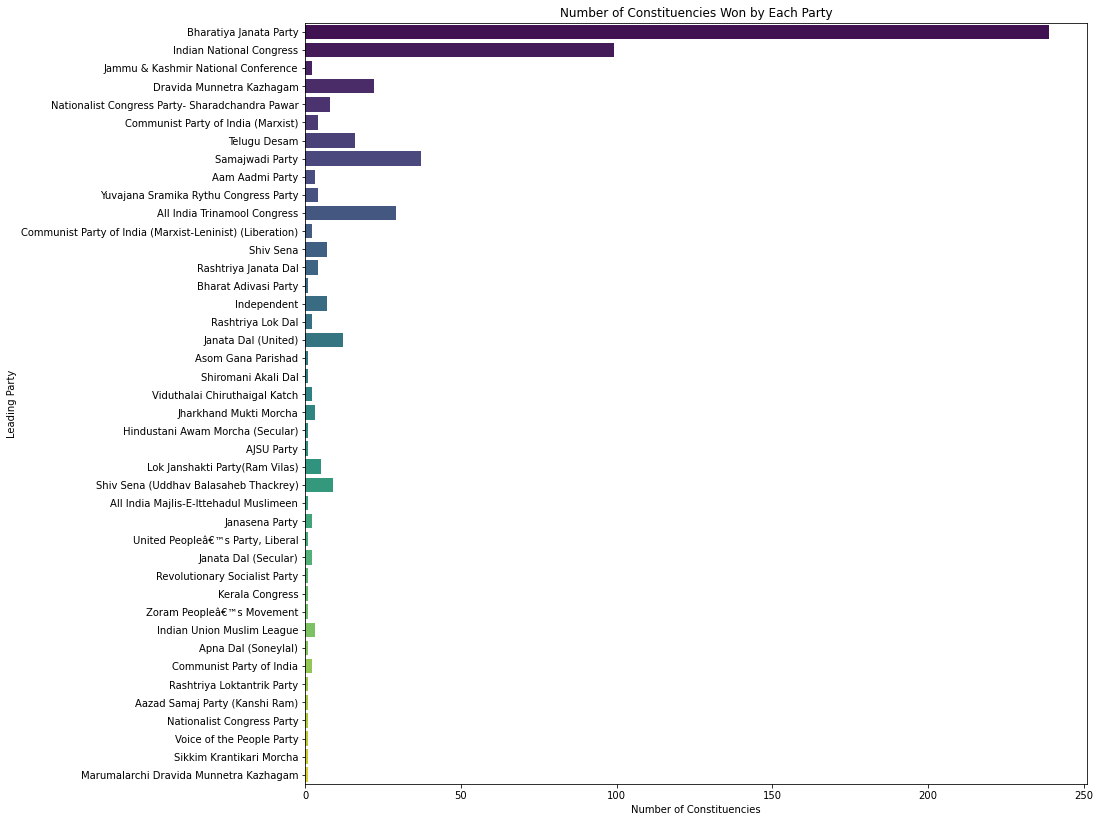

In [5]:
plt.figure(figsize=(14,14))
sns.barplot(x='Total Counts',y='leading_party',data=df_2,palette="viridis")
plt.title('Number of Constituencies Won by Each Party')
plt.xlabel('Number of Constituencies')
plt.ylabel('Leading Party')
plt.show()

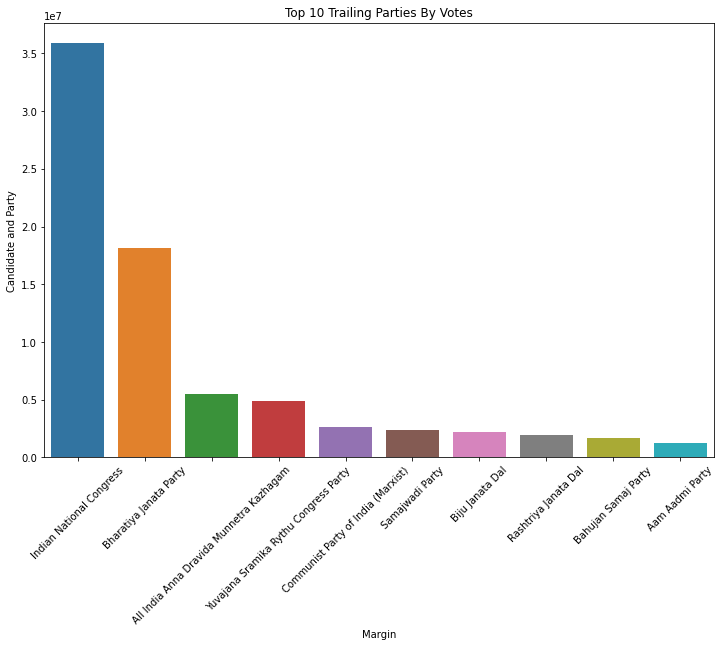

In [14]:
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query4 = """
select trailing_party , SUM(margin) as sum
from election_results	
group by trailing_party
order by sum desc 
limit 10;
"""

cursor.execute(query4)

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['trailing_party', 'count'])

cursor.close()
conn.close()

df


plt.figure(figsize=(12, 8))
sns.barplot(x='trailing_party', y='count', data=df)
plt.title('Top 10 Trailing Parties By Votes')
plt.xlabel('Margin')
plt.ylabel('Candidate and Party')
plt.xticks(rotation=45)
plt.show()

In [15]:
df

,trailing_party,count
0,Indian National Congress,35872203
1,Bharatiya Janata Party,18160854
2,All India Anna Dravida Munnetra Kazhagam,5519091
3,Yuvajana Sramika Rythu Congress Party,4926068
4,Communist Party of India (Marxist),2622123
5,Samajwadi Party,2365143
6,Biju Janata Dal,2236289
7,Rashtriya Janata Dal,1962693
8,Bahujan Samaj Party,1716321
9,Aam Aadmi Party,1277670


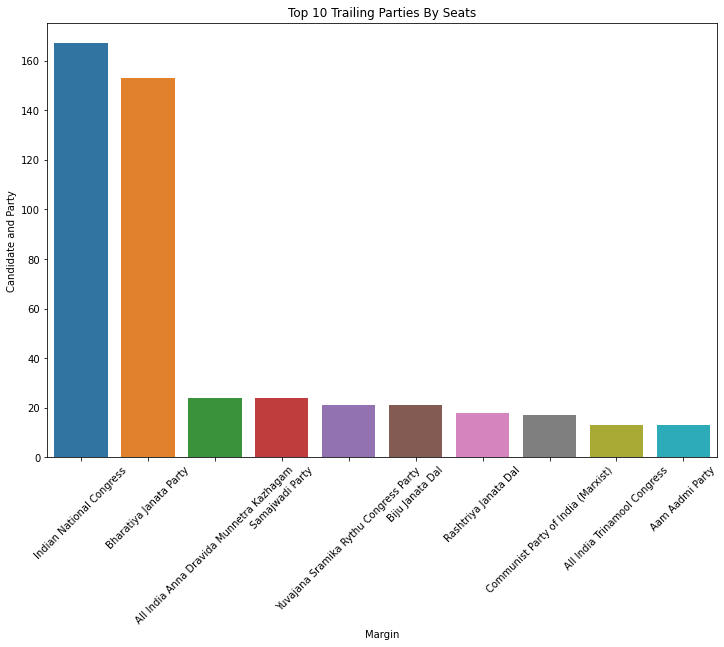

In [18]:
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query4 = """
select trailing_party , COUNT(*) as sum
from election_results	
group by trailing_party
order by sum desc 
limit 10;
"""

cursor.execute(query4)

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['trailing_party', 'count'])

cursor.close()
conn.close()

df


plt.figure(figsize=(12, 8))
sns.barplot(x='trailing_party', y='count', data=df)
plt.title('Top 10 Trailing Parties By Seats')
plt.xlabel('Margin')
plt.ylabel('Candidate and Party')
plt.xticks(rotation=45)
plt.show()

In [19]:
df

,trailing_party,count
0,Indian National Congress,167
1,Bharatiya Janata Party,153
2,All India Anna Dravida Munnetra Kazhagam,24
3,Samajwadi Party,24
4,Yuvajana Sramika Rythu Congress Party,21
5,Biju Janata Dal,21
6,Rashtriya Janata Dal,18
7,Communist Party of India (Marxist),17
8,All India Trinamool Congress,13
9,Aam Aadmi Party,13


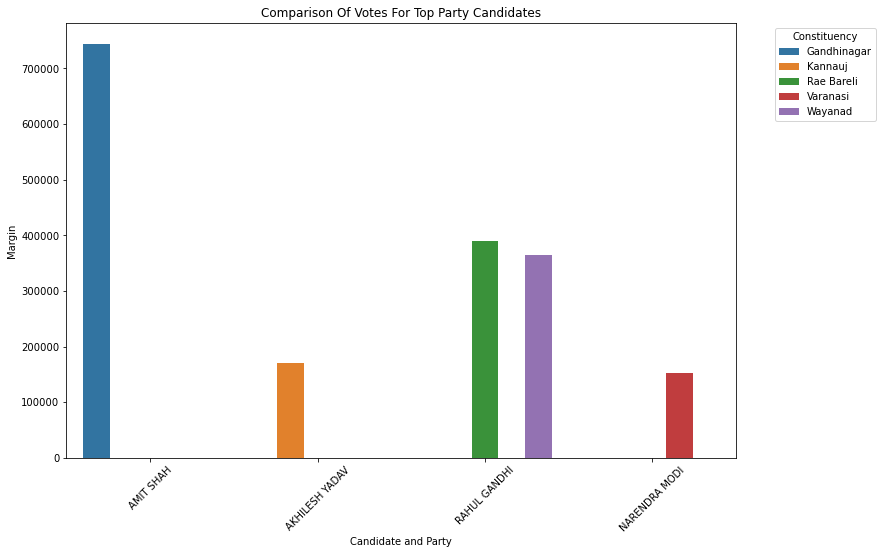

In [20]:
db_config = {
    'user': 'root',       # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',           # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'    # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query4 = """
WITH CTE AS (
    SELECT * 
    FROM election_results
    WHERE leading_candidate IN ('Rahul Gandhi', 'Narendra Modi', 'Amit Shah', 'Akhilesh Yadav')
)
SELECT
    constituency,
    leading_candidate,
    CAST(SUM(margin) AS FLOAT) AS Sum
FROM
    CTE
GROUP BY
    constituency,
    leading_candidate


"""

cursor.execute(query4)

results = cursor.fetchall()

df = pd.DataFrame(results, columns=['constituency','leading_candidate', 'sum'])

cursor.close()
conn.close()

df


plt.figure(figsize=(12, 8))
sns.barplot(x='leading_candidate', y='sum', hue='constituency', data=df)
plt.title('Comparison Of Votes For Top Party Candidates')
plt.xlabel('Candidate and Party')
plt.ylabel('Margin')
plt.xticks(rotation=45)

plt.legend(title='Constituency', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [9]:
df

,constituency,leading_candidate,sum
0,Gandhinagar,AMIT SHAH,744716.0
1,Kannauj,AKHILESH YADAV,170922.0
2,Rae Bareli,RAHUL GANDHI,390030.0
3,Varanasi,NARENDRA MODI,152513.0
4,Wayanad,RAHUL GANDHI,364422.0


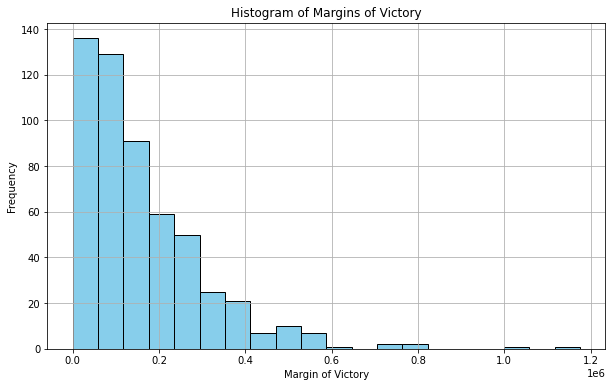

In [10]:
db_config = {
    'user': 'root',        # Replace with your MySQL username
    'password': 'admin',   # Replace with your MySQL password
    'host': 'localhost',   # Replace with your MySQL host, e.g., 'localhost'
    'database': 'election_data'  # Replace with your database name
}

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

query = """
SELECT
    margin
FROM
    election_results;
"""

cursor.execute(query)

results = cursor.fetchall()

cursor.close()
conn.close()

df = pd.DataFrame(results, columns=['margin'])


plt.figure(figsize=(10, 6))
plt.hist(df['margin'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Margins of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
